# Importing Libraries and Datasets

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/STAT_495/flipkart_data.csv"

In [ ]:
data = pd.read_csv(path)
data.head()

review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [ ]:
# * Rating Summary
data.describe().T
# * the order of levels based on the counting number
data.rating.value_counts().index

Int64Index([5, 4, 3, 1, 2], dtype='int64')

In [ ]:
# * missing values
data.isnull().sum()

review    0
rating    0
dtype: int64

In [ ]:
# unique ratings
pd.unique(data['rating']) # return the levels of ratings

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

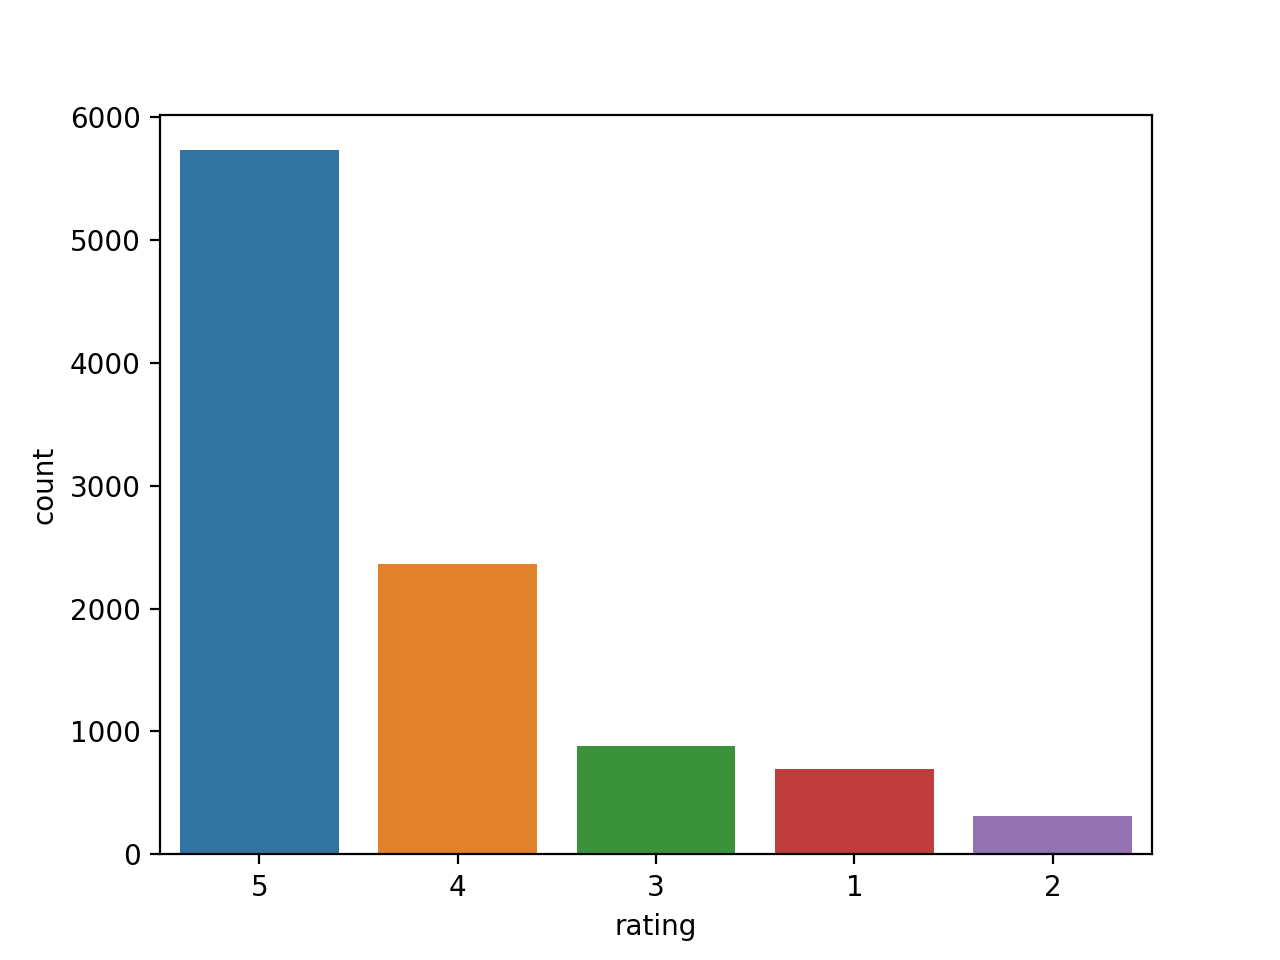

In [ ]:
# barplot the x = count of ratings and y = levels of ratings
sns.countplot(data=data,
			x='rating',
			order = data.rating.value_counts().index)

## *** MORE visualization

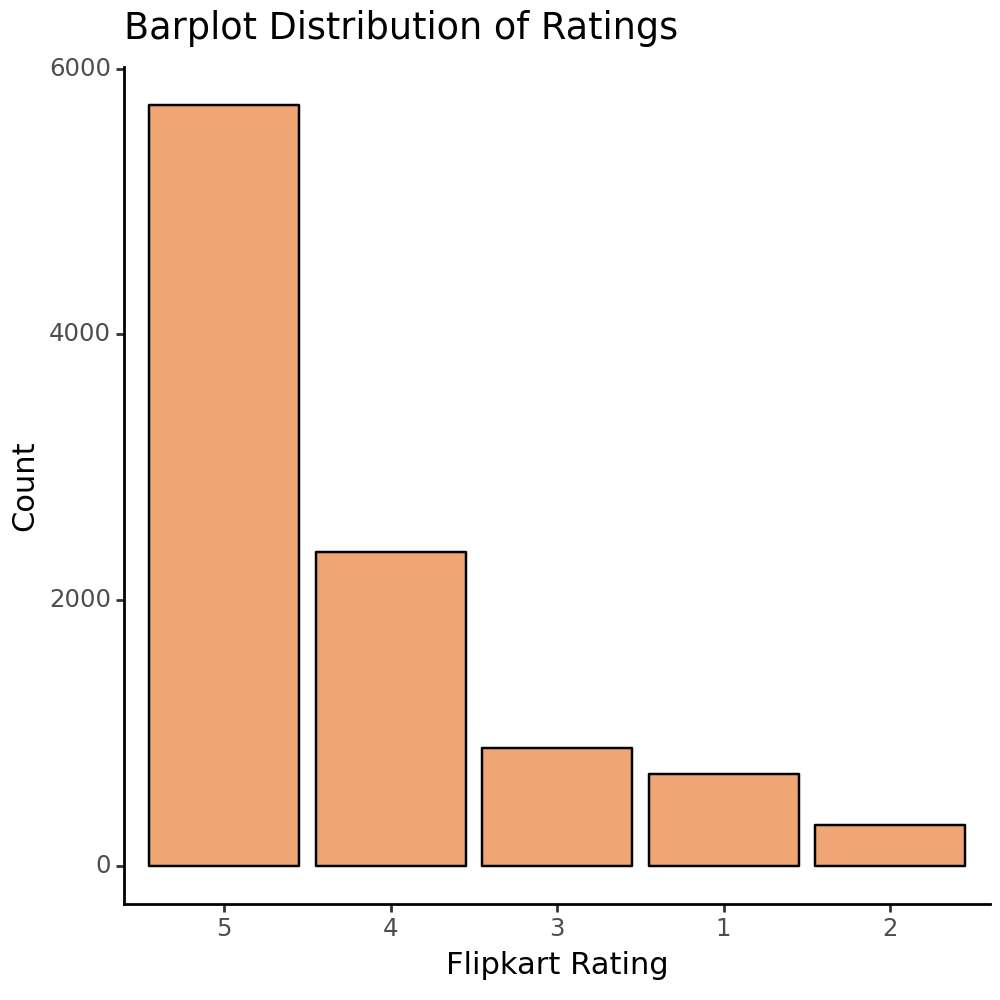

In [ ]:
# ** Bar plot counting the number of rating
from plotnine.themes.theme_classic import theme_classic
from plotnine import ggplot, aes, geom_bar, labs, theme
import pandas as pd

data['rating'] = pd.Categorical(data['rating'], categories = [5, 4, 3, 1, 2], ordered = True)

Flipkart = (ggplot(data, aes(x = 'rating'))
            + geom_bar(fill = '#E98038', color = 'black', alpha = 0.7, position = 'stack')
            + labs(title = "Barplot Distribution of Ratings", x = 'Flipkart Rating', y = 'Count')
            + theme_classic()
            + theme(figure_size=(5, 5)))

print(Flipkart)

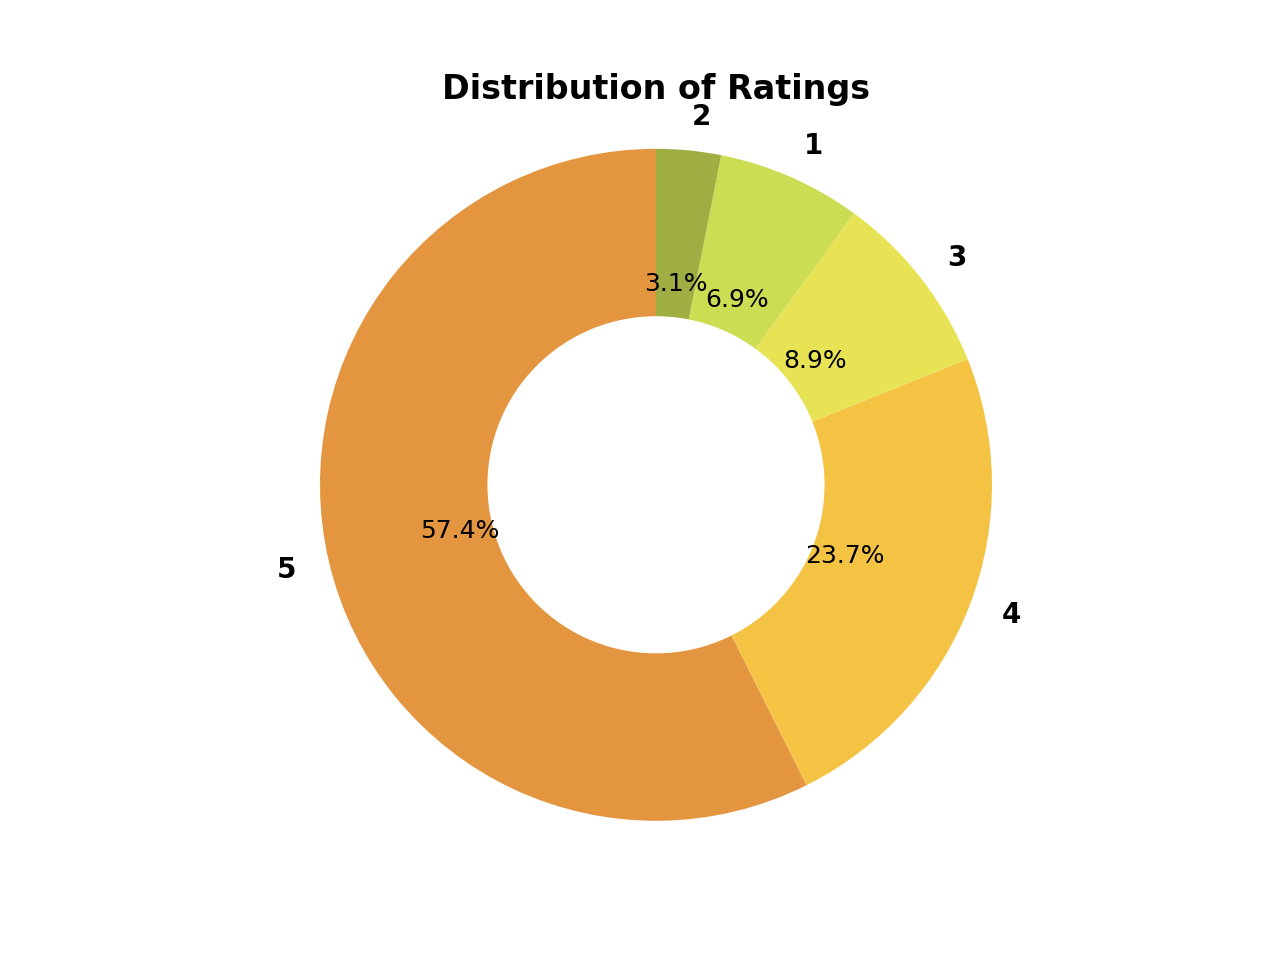

In [ ]:
import matplotlib.pyplot as plt

# ** Assuming you have a DataFrame named "data" with a "rating" column
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

# Define the hex codes for the fill colors
colors = ["#E3963F","#F5C343","#E7E354","#CCDC53","#A0AD42"]

# Create a pie chart with a hole in the middle
figure, ax = plt.subplots()

# Outer ring (pie chart) with specified colors
wedges, texts, autotexts = ax.pie(
    quantity, labels=numbers, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), colors=colors
)

# Inner circle (hole)
centre_circle = plt.Circle((0, 0), 0.5, color='white', edgecolor='black', linewidth=0.4)
ax.add_patch(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title to the pie chart
ax.set_title('Distribution of Ratings', weight='bold')

# Improve readability by adjusting the position of the labels
for text, autotext in zip(texts, autotexts):
    text.set(color='black', size=10, weight='bold')
    autotext.set(color='black', size=9)

# Display the plot
plt.show()


In [ ]:
# ** Descriptive statistical measures of the dataset.
from prettytable import PrettyTable

table_data = data.describe().T

# Create a PrettyTable with bold and larger font title

table = PrettyTable(list(table_data.columns))
table.align = 'r'  # Right-align the data
table.title = 'Flipkart Statistical Summary'
table.title_style = {'bold': True, 'font-size': '30x'}

# Add data to the table row by row

for row in table_data.itertuples():
    table.add_row(row[1:])

print(table)

+---------------------------------------+
|      Flipkart Statistical Summary     |
+-------+--------+---------------+------+
| count | unique |           top | freq |
+-------+--------+---------------+------+
|  9976 |   7694 | GoodREAD MORE |  264 |
|  9976 |      5 |             5 | 5726 |
+-------+--------+---------------+------+


# Preprocessing and cleaning the reviews

* The most Rating is 5.
* there is less Rating of 3, 1, and 2.

In [ ]:
# rating label(final)
pos_neg = []
# creat a empty list
for i in range(len(data['rating'])):
	 # for rows of variable rating
	if data['rating'][i] >= 5:
		 # if the rating is greater or equals to 5
		pos_neg.append(1)
	# label the rating as 1
	else:
		pos_neg.append(0)
	 # for the rating 4 or less, label it as 0.

data['label'] = pos_neg
# creat a new variable into the data named "label" and with 0 or 1 only

In [ ]:
from tqdm import tqdm

def preprocess_text(text_data):
	preprocessed_text = [] # create a list

	for sentence in tqdm(text_data): # for the sentence in the data
	### Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)
	# search the pattern and replace them with a space in the sentence

	### Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower() # converts each word (token) to lowercase
	# to join the individual words of a sentence back together
	# into a single string with spaces in between
										for token in nltk.word_tokenize(sentence)
					# splits the sentence into individual words;
										if token.lower() not in stopwords.words('english')))
					# if the words are stopwords in English then split it into words and add into the list.
	return preprocessed_text

In [ ]:
import nltk
nltk.download('punkt')
# The 'punkt' tokenizer is a pre-trained model for tokenizing text, and it's required for word tokenization using NLTK
preprocessed_review = preprocess_text(data['review'].values)
# apply the preprocess function into the variable Reviews
data['review'] = preprocessed_review
# replace "Review" with the clean strings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 9976/9976 [00:33<00:00, 294.14it/s]


In [ ]:
data.head()

review rating  label
0  nice produt like design lot easy carry looked ...      5      1
1  awesome soundvery pretty see nd sound quality ...      5      1
2  awesome sound quality pros 78 hrs battery life...      4      0
3  think good product per quality also design qui...      5      1
4  awesome bass sound quality good bettary long l...      5      1

# Analysis of the Dataset

In [ ]:
data["label"].value_counts() # count the postive and negative reviews

1    5726
0    4250
Name: label, dtype: int64

# Visualization from Website

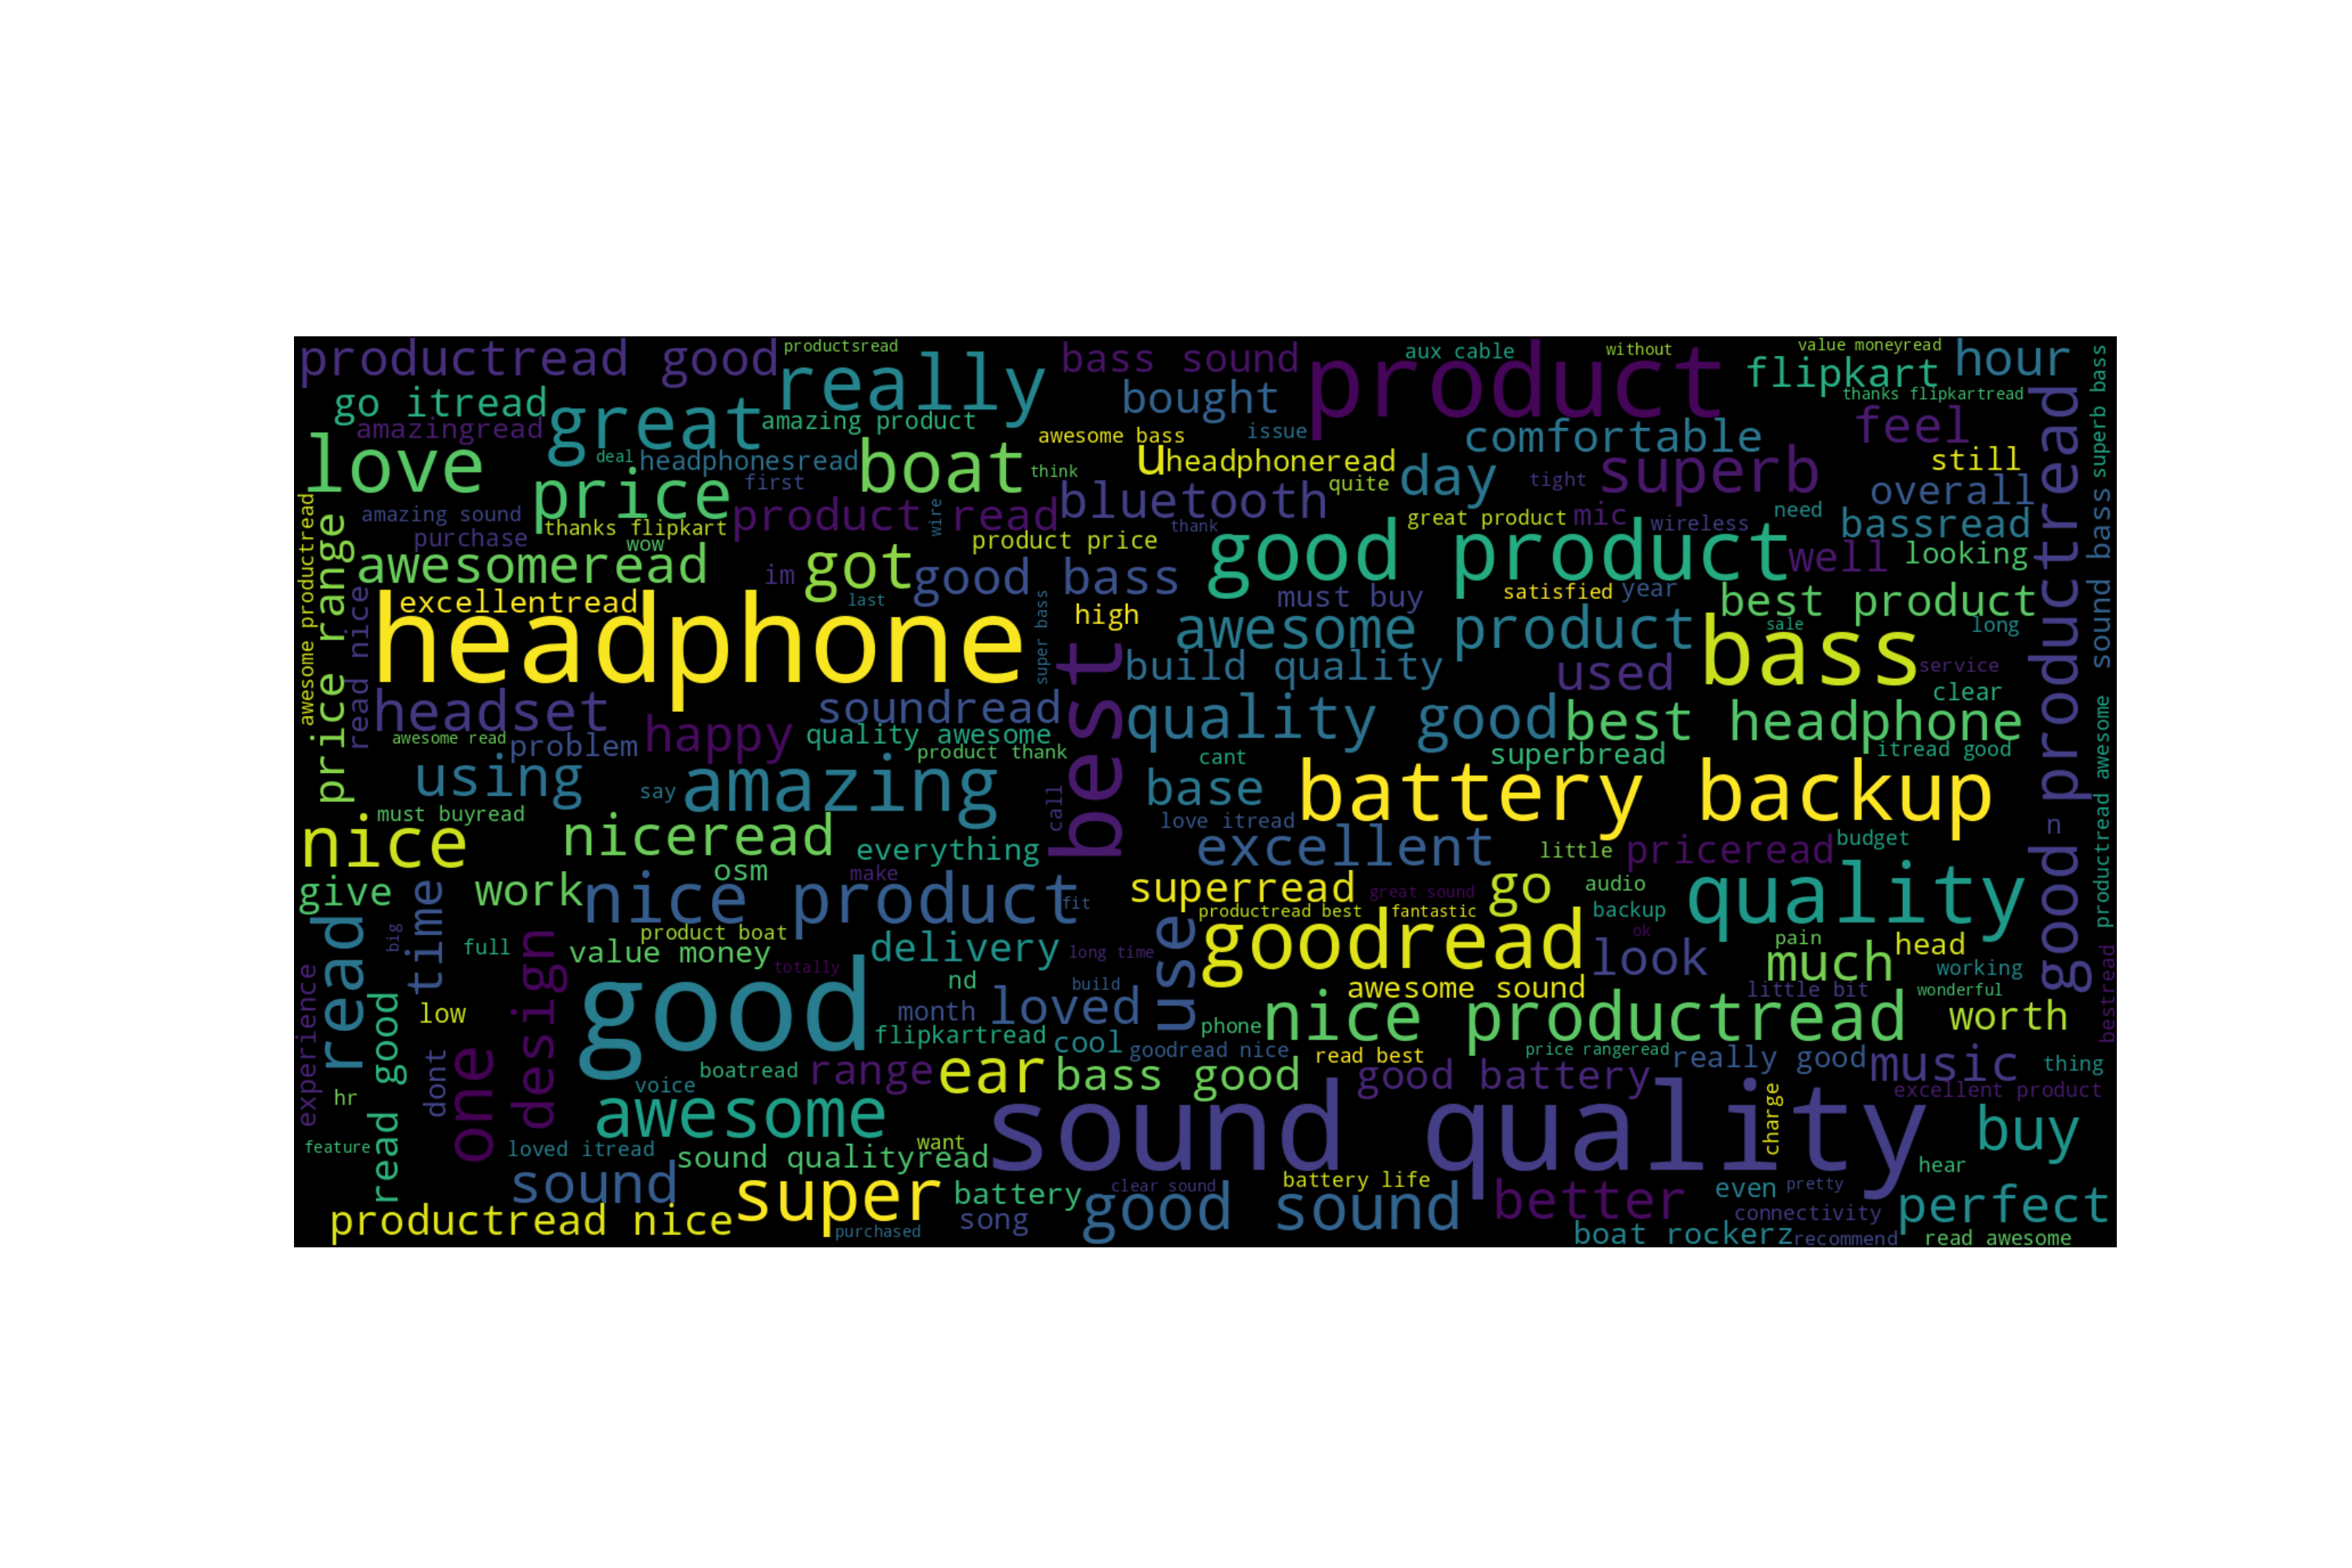

In [ ]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
# consolidates text data from the 'review' where the 'label' column is equal to 1 (refers to positive reviews)
# converts these selected text values to strings and joins them into a single long string, separated by spaces.
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
# creates a WordCloud object with specified parameters

# generates the word cloud image with the data from consolidate:
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
# interpolation='bilinear' option is used for smoother image rendering
plt.axis('off')
# removes the axis
plt.show()

# * Version Visualization for Bad reviews

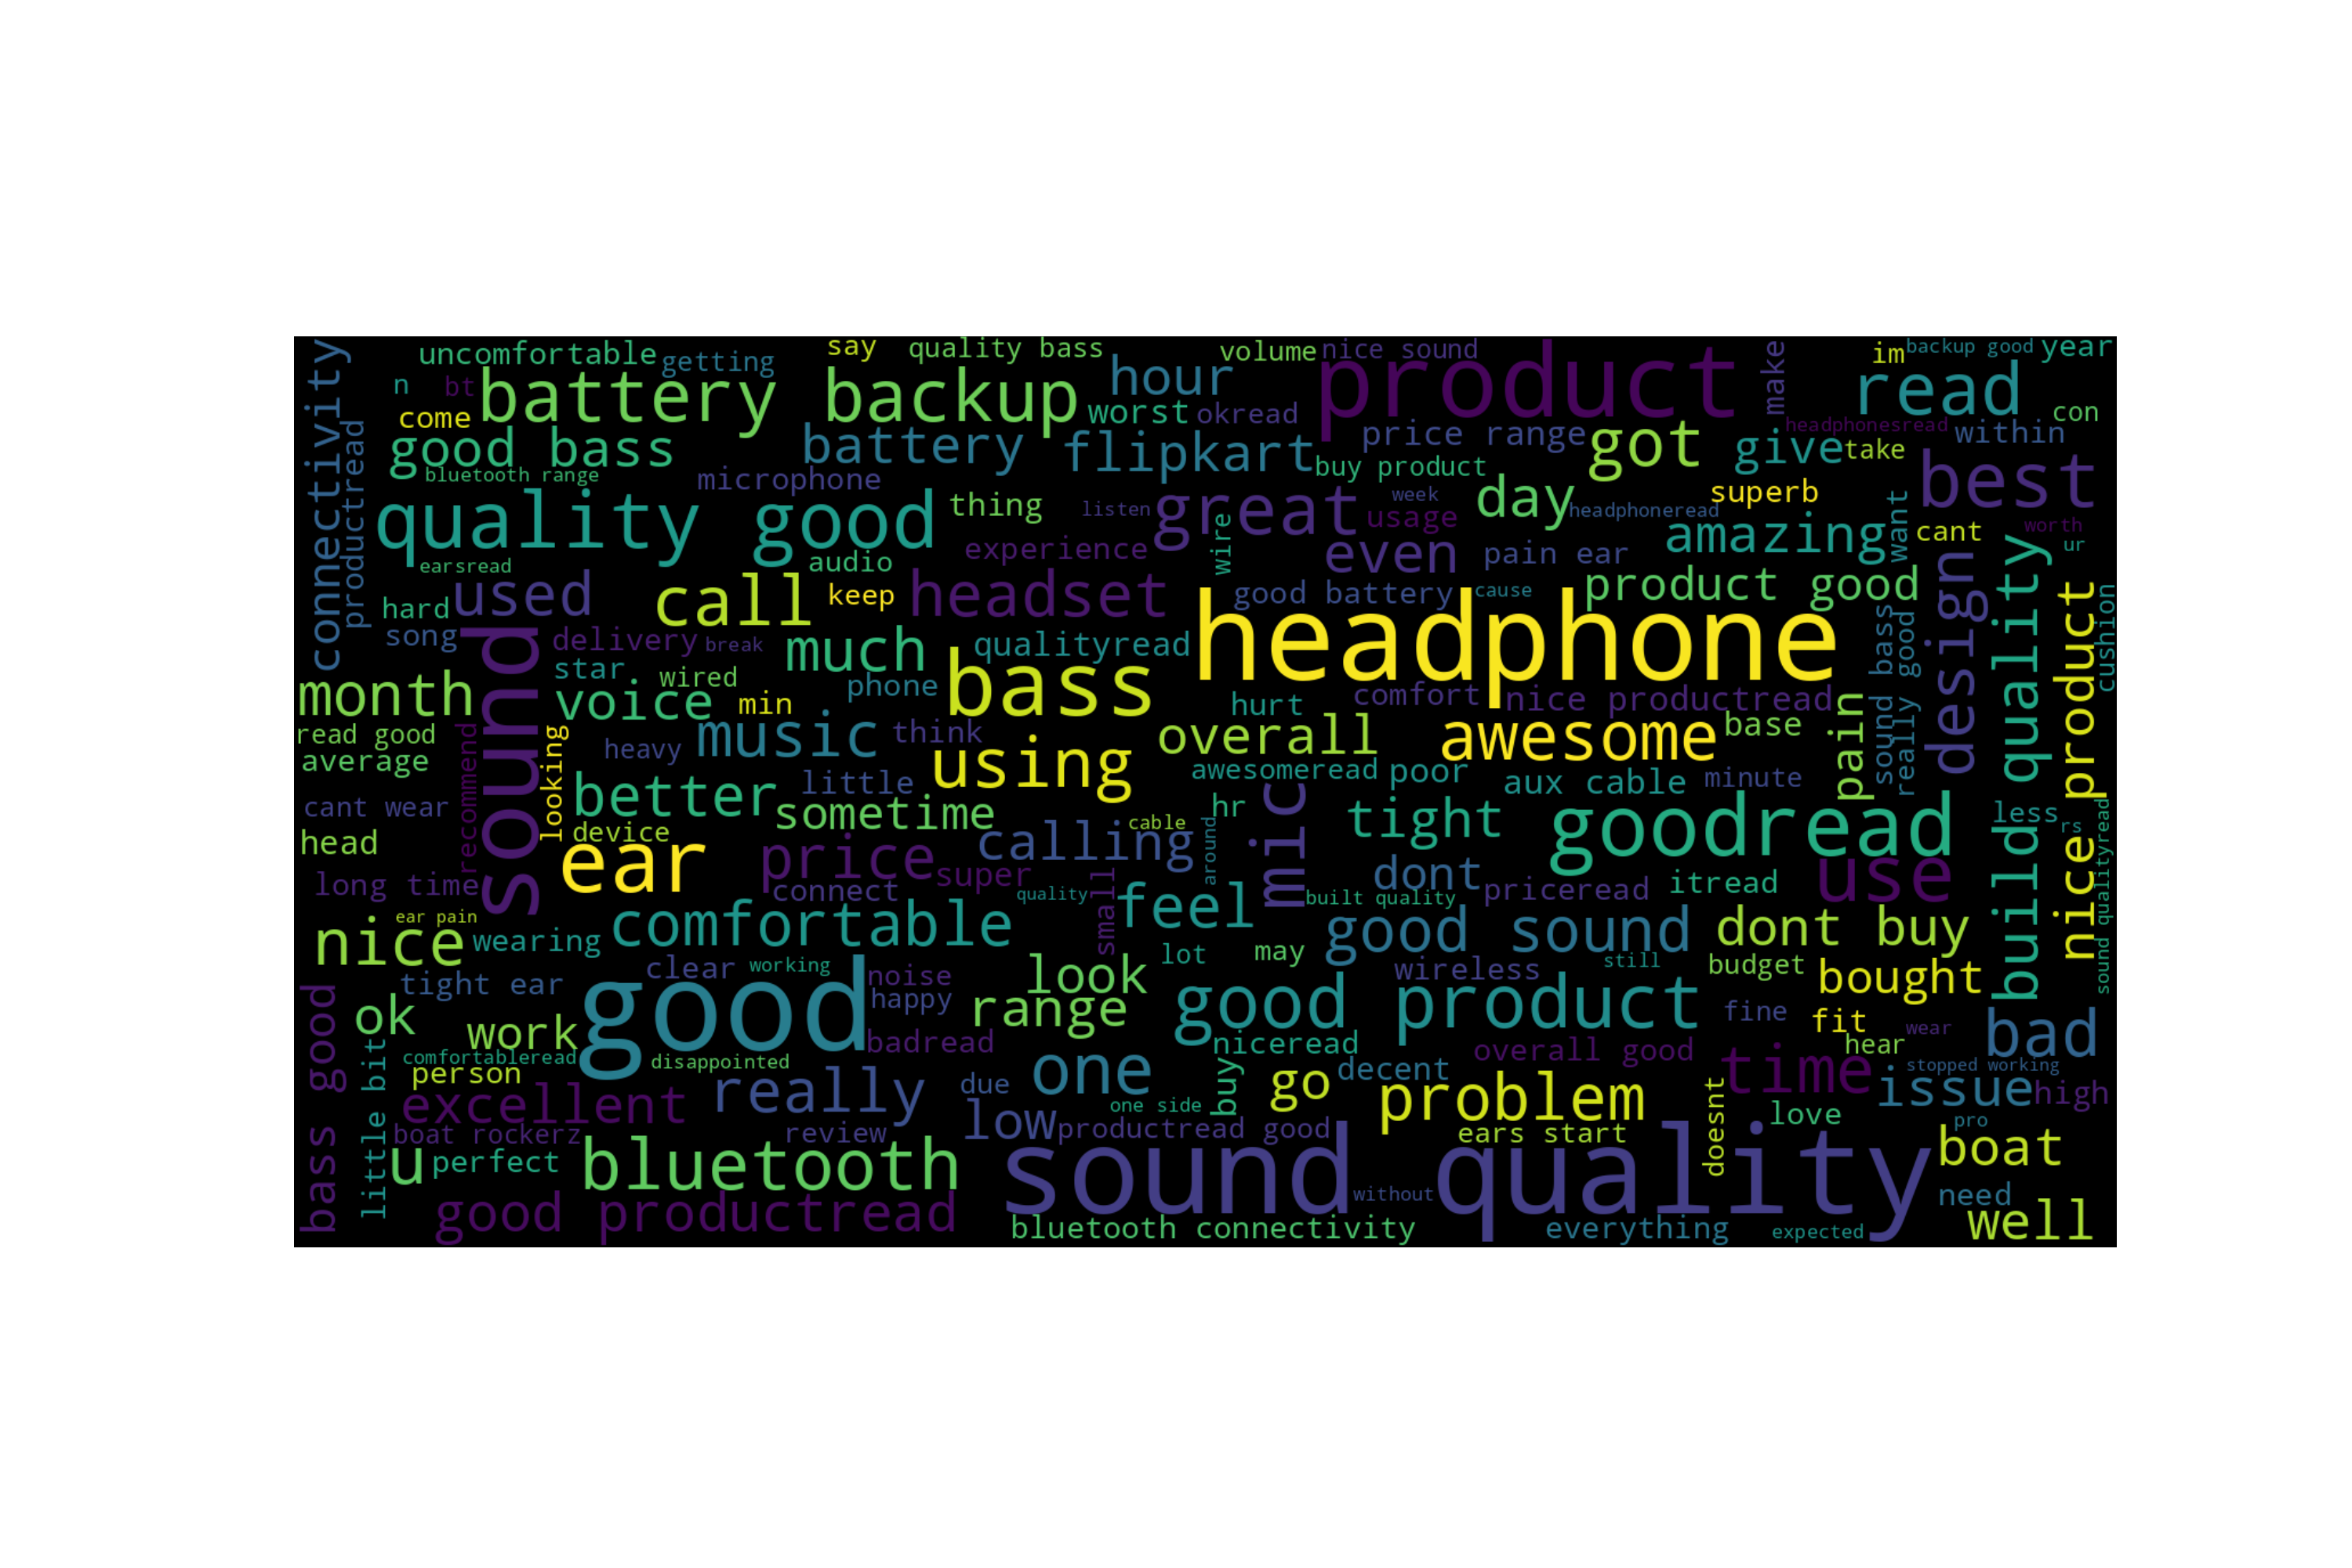

In [ ]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 0].astype(str))
# consolidates text data from the 'review' where the 'label' column is equal to 1 (refers to positive reviews)
# converts these selected text values to strings and joins them into a single long string, separated by spaces.
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
# creates a WordCloud object with specified parameters

# generates the word cloud image with the data from consolidate:
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
# interpolation='bilinear' option is used for smoother image rendering
plt.axis('off')
# removes the axis
plt.show()

# * Version Visualization for All reviews

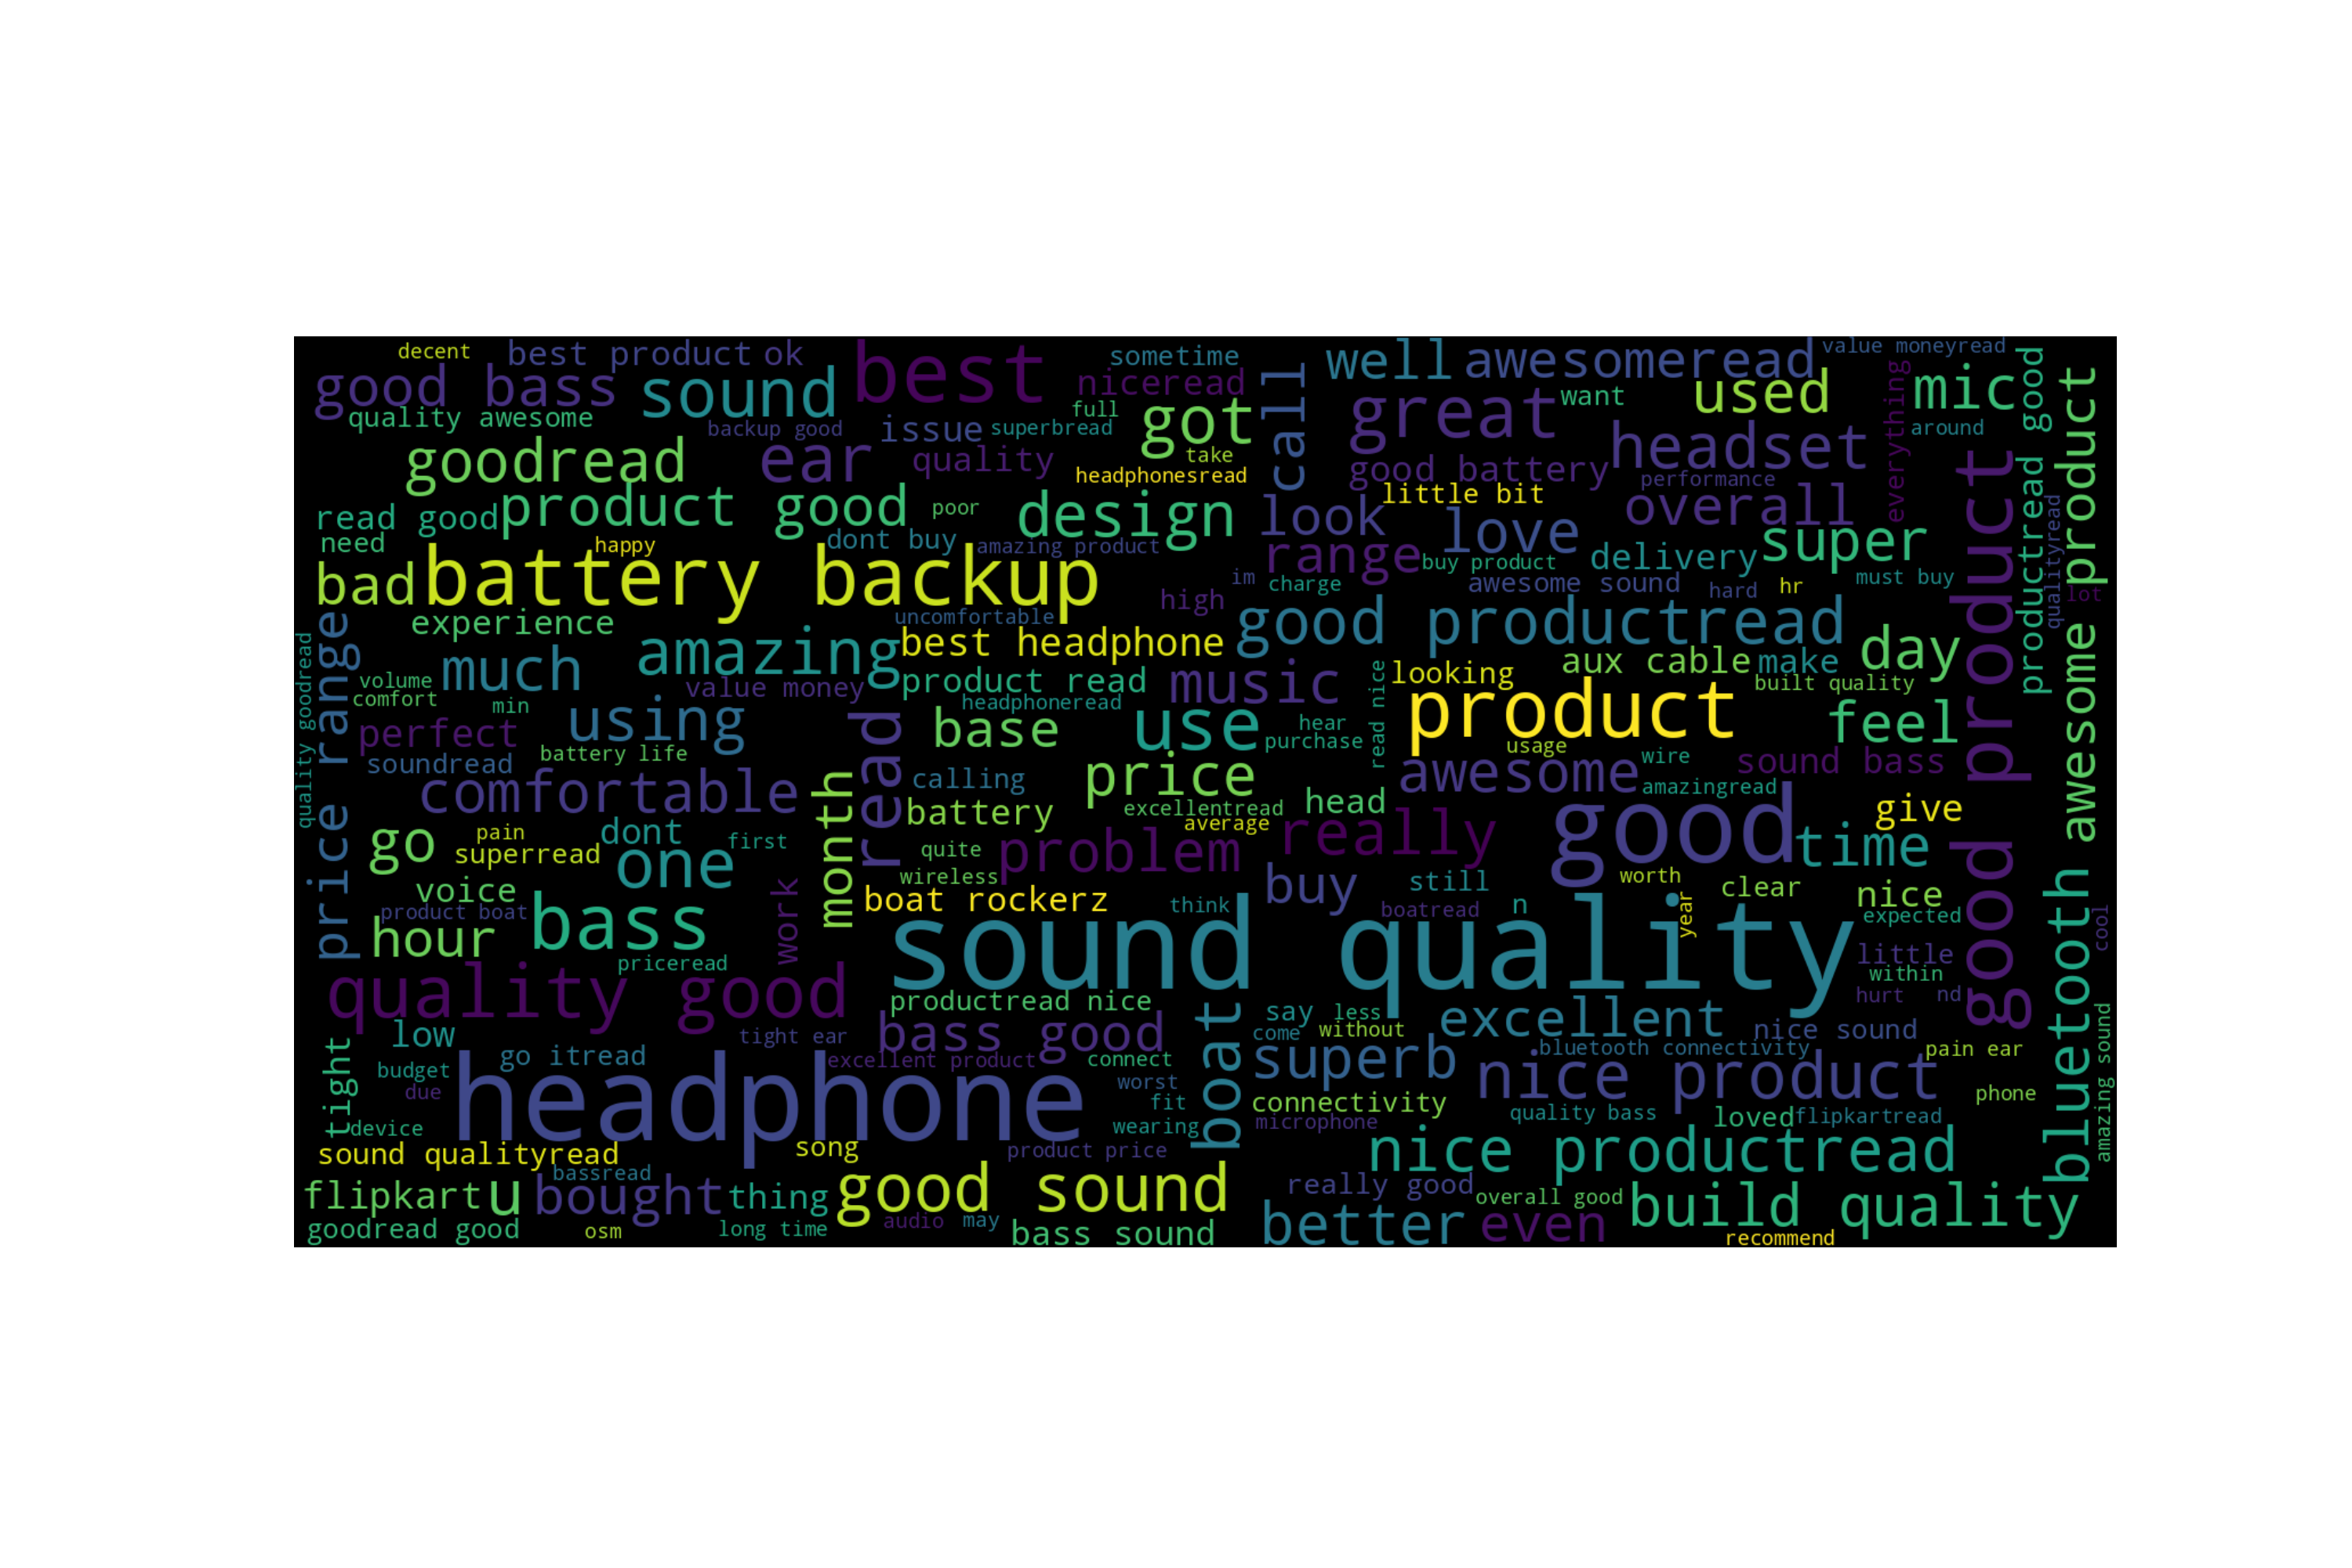

In [ ]:
data['review'][::]

consolidated = ' '.join(
	word for word in data['review'][::].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting text into Vectors

In [ ]:
cv = TfidfVectorizer(max_features=2500)
# transform a collection of text documents into a TF-IDF matrix
# max_features: specifies the maximum number of features (words) to include in the TF-IDF matrix


X = cv.fit_transform(data['review'] ).toarray()
# fits the vectorizer to the 'review' data and transforms it into a TF-IDF matrix
# converts the TF-IDF matrix into a dense NumPy array

In [ ]:
X # The feature matrix = TF-IDF matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model training, Evaluation, and Prediction

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													# specifies that 33% of the data will be used for testing,
													# and the remaining 67% will be used for training
													stratify=data['label'],
													# ensures that the class distribution in the training and testing sets
													# is similar to the overall distribution in the original dataset
                          random_state = 42)
													# sets a random seed for reproducibility.

# X_train: The feature matrix for the training set.
# X_test: The feature matrix for the testing set.
# y_train: The corresponding labels for the training set.
# y_test: The corresponding labels for the testing set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# used to create and train a decision tree classifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree Classifier with a specified random state of 0
model = DecisionTreeClassifier(random_state=0)
#  Setting a random state ensures that the behavior of
# the classifier remains consistent and reproducible

# Train the model on the training data
model.fit(X_train,y_train)

# testing the model on the training data
pred = model.predict(X_test)
# make predictions on the training data using the trained model.

# Calculate and print the accuracy of the model on the training data
print(accuracy_score(y_test,pred))
# compares the true labels (y_train) with the predicted labels (pred) and
# calculates the accuracy, which is the fraction of
# correctly predicted samples

0.6771940479805648


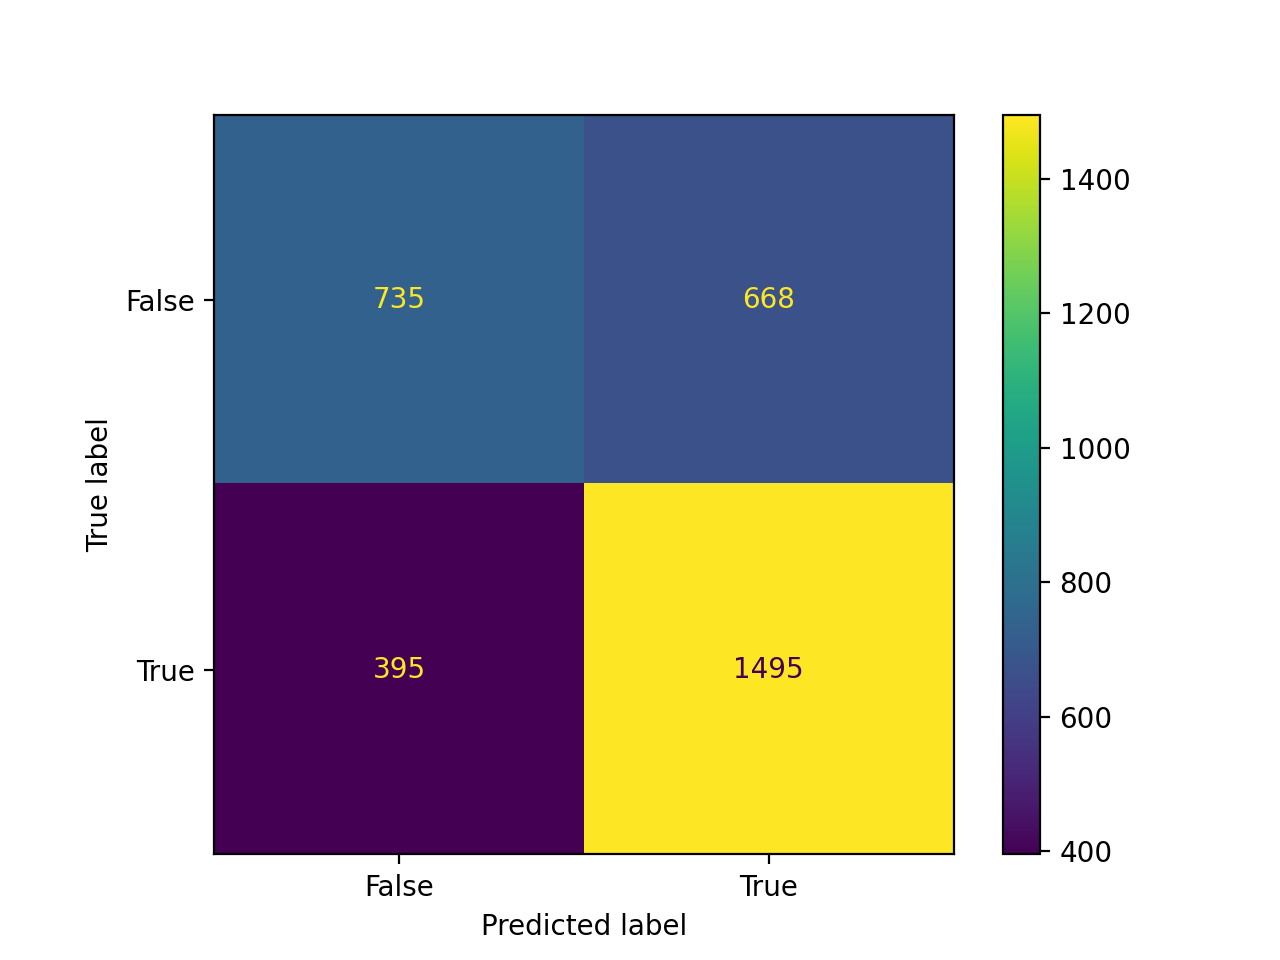

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
# a 2x2 matrix that represents
# true positives, true negatives, false positives, and false negatives

# visualize the confusion matrix:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

# *** Improve

In [ ]:
path = "/content/drive/MyDrive/STAT_495/flipkart_data.csv"
data2 = pd.read_csv(path)

## check duplicate and remove

In [ ]:
# * check duplicate
print(data2.shape)
# * remove duplicated
data2.drop_duplicates(inplace=True, ignore_index=True)
print(data2.shape)

(9976, 2)
(7868, 2)


In [ ]:
data2.head()
data2.tail()

review  rating
7863                            good headphoneREAD MORE       4
7864                              Bad product.READ MORE       1
7865       It's tight and not more comfortableREAD MORE       4
7866  Everything is amazimg but the built is very li...       5
7867       Best headphone i have ever used....READ MORE       5

In [ ]:
data2.isnull().sum()

review    0
rating    0
dtype: int64

## split data into 5,4,3 as postive review and 2,1 as negative review


In [ ]:
# rating label
pos_neg1 = []
for i in range(len(data2['rating'])):
	if data2['rating'][i] >= 3:
		pos_neg1.append(1)
	else:
		pos_neg1.append(0)
data2['label'] = pos_neg1

In [ ]:
data2["label"].value_counts()

1    6957
0     911
Name: label, dtype: int64

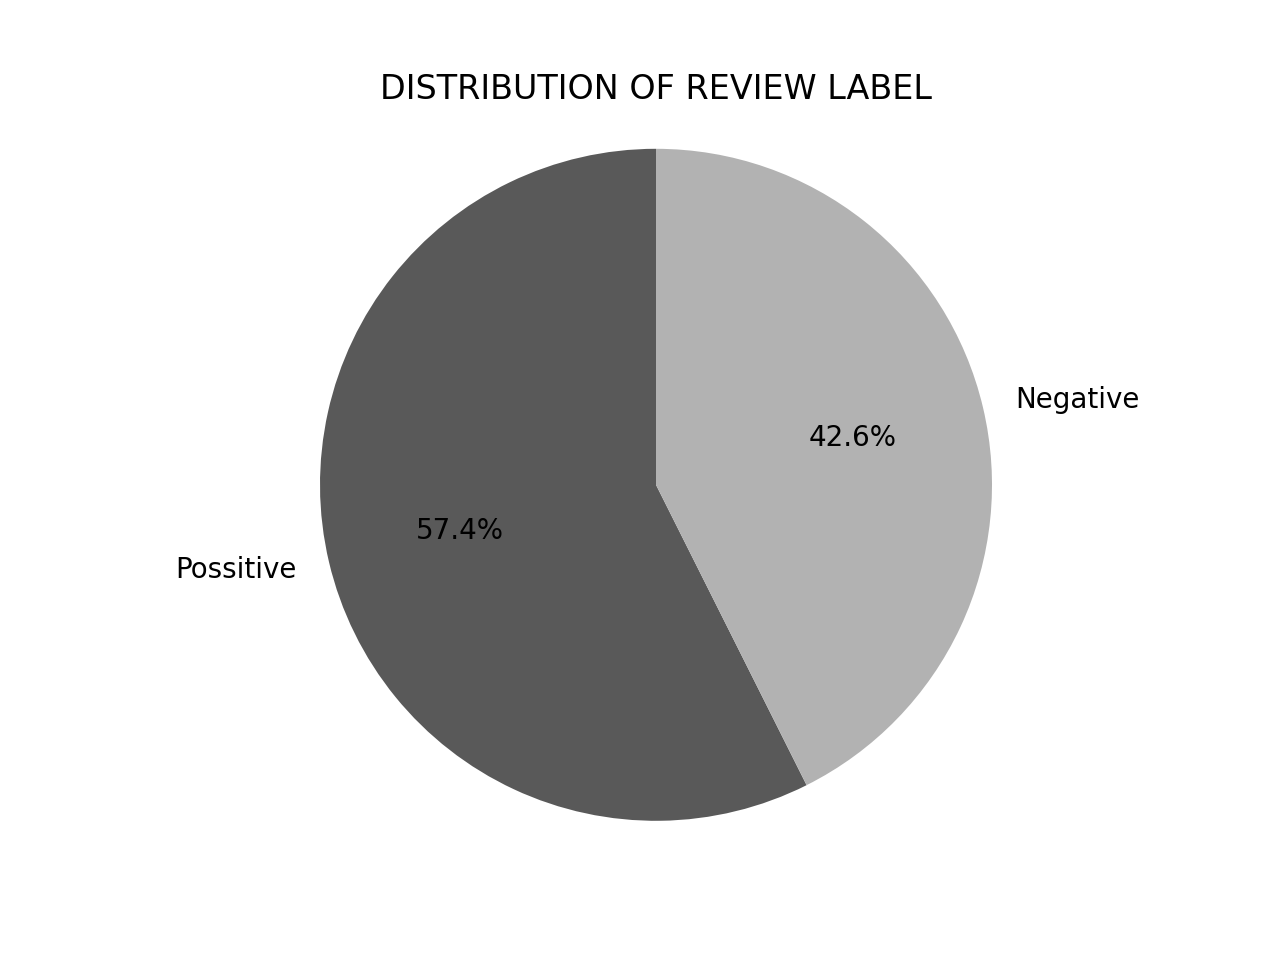

In [ ]:
# Sample data
labels = ['Possitive', 'Negative']
sizes = [data["label"].value_counts()[1]*100/len(data['label']), data["label"].value_counts()[0]*100/len(data['label'])]  # Percentages

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#595959','#b2b2b2'])

# Add a title
plt.title('DISTRIBUTION OF REVIEW LABEL')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

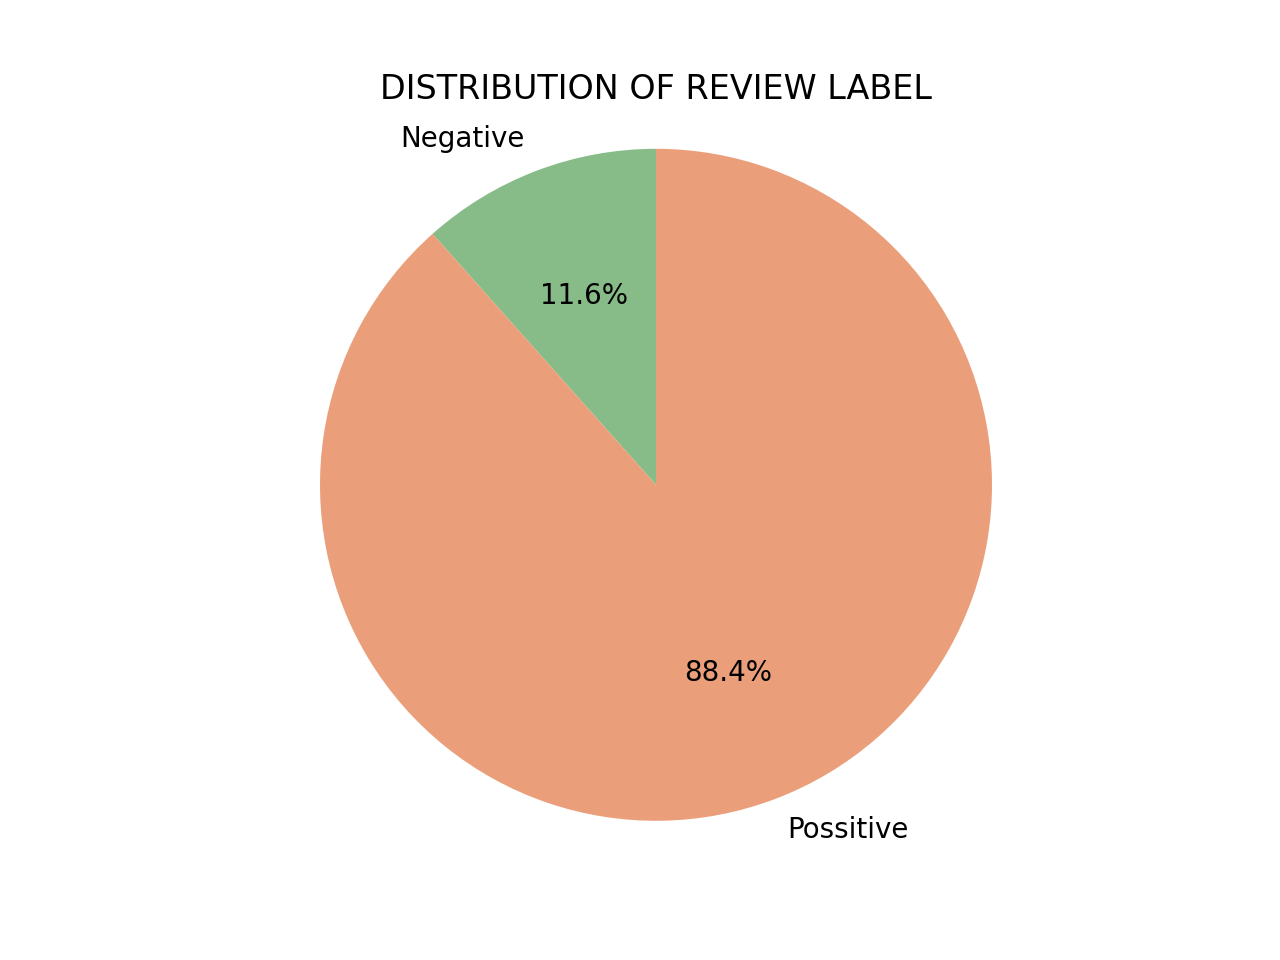

In [ ]:
import matplotlib.pyplot as plt

# Sample data
labels1 = [ 'Negative','Possitive']
sizes1 = [911*100/(6957+911),6957*100/(6957+911) ]  # Percentages

# Create a pie chart
plt.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#87BB87','#EA9F7A'])

# Add a title
plt.title('DISTRIBUTION OF REVIEW LABEL')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

## clean the text stopword and punctuation

In [ ]:
#Customize stopword as per data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might","battery","headphone",
                 "product","bluetooth","bass","headphones", "read"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{"it's", 'most', 'yourselves', 'same', 'once', "you've", "don't", 'what', 'nor', 'were', 'did', 'a', 'after', 'such', 'was', 'which', 'before', 'down', 'out', 'until', 's', "you're", 'hers', 'when', 'more', 'needn', 'yours', 'd', 'won', 'couldn', 'with', 'further', 'up', 'while', "isn't", 'her', 'just', 'own', 'too', 'them', "couldn't", 'over', 'his', "shan't", "doesn't", 'my', 'the', 'these', 'your', 'shouldn', 'having', 'i', 'whom', 'haven', 'we', 'has', 'into', 'how', 'for', 'doesn', 'yourself', 'in', 'hadn', 'bluetooth', 'between', 'or', 'themselves', "should've", 'if', 'all', 'headphone', 'no', 'ourselves', "wasn't", 'she', 'but', 'other', 'aren', 'product', 'don', 'be', 'than', "weren't", 'shall', 'him', 'some', 'didn', 'because', 'why', 'from', 'very', 'll', 'so', 'weren', 'is', "won't", 'by', 'can', 'during', 'and', 'off', 'an', 'any', 'few', 't', 'mustn', 'each', 'as', 'wasn', 'are', 'been', 'to', 'shan', 'its', 'should', 'himself', 'could', 'does', 'now', 'those', 'me', 'itse

In [ ]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''
## From github: https://github.com/OptimalXAI/Sentiment_Analysis_Case_Study/blob/main/sentimentanalysis/notebooks/Phase%203%20Model%20Selection%20for%20Sentiment%20Analyzer.ipynb
#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"productread", "product read", content)
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

In [ ]:
#Data cleaning
data2['reviews_clean']=data2['review'].apply(data_cleaning)
data2.head(5)

review  rating  label  \
0  It was nice produt. I like it's design a lot. ...       5      1   
1  awesome sound....very pretty to see this nd th...       5      1   
2  awesome sound quality. pros 7-8 hrs of battery...       4      1   
3  I think it is such a good product not only as ...       5      1   
4  awesome bass sound quality very good bettary l...       5      1   

                                       reviews_clean  
0  nice produt like design lot easy carry looked ...  
1  awesome sound pretty see nd sound quality good...  
2  awesome sound quality pros hrs life including ...  
3  think good not per quality also design quite g...  
4  awesome sound quality good bettary long life p...

## Wordcloud

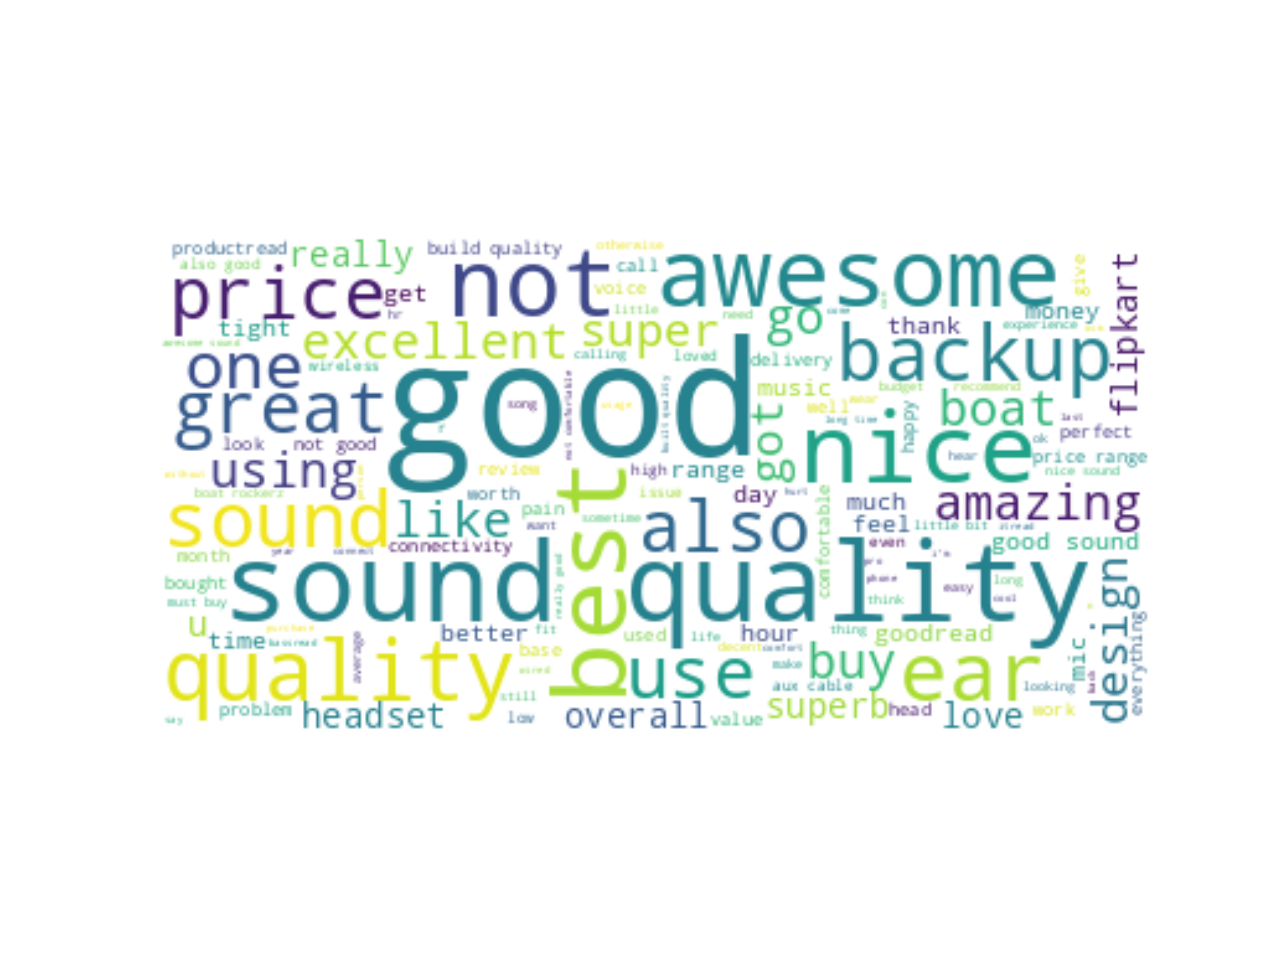

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
text1 = data2[data2.label==1].review.tolist() # positive review

# join the list and lowercase all the words
text1 = ' '.join(text1).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words,
                      background_color='white',
                      collocations=True).generate(text1)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

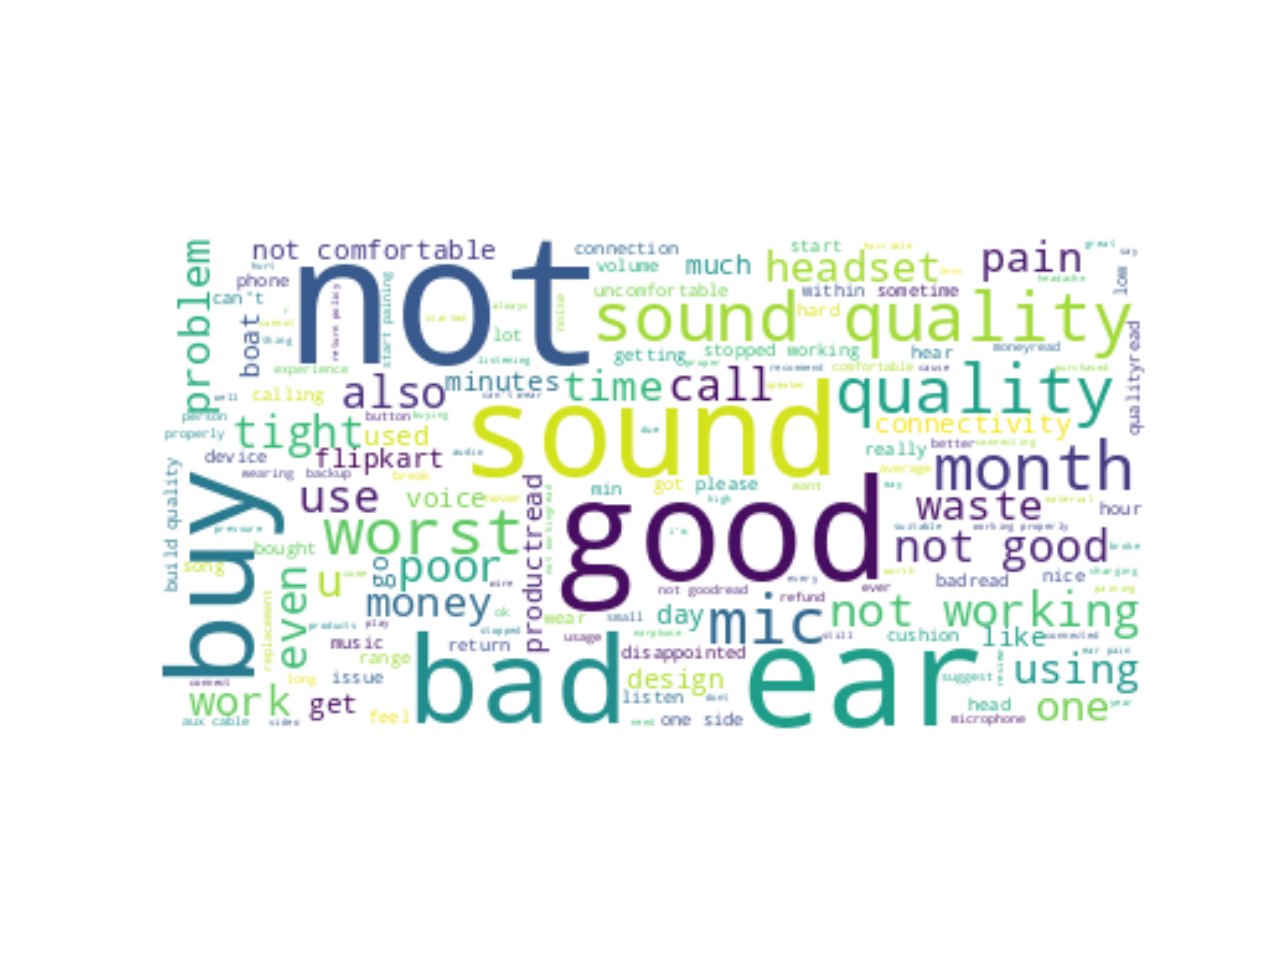

In [ ]:
text0 = data2[data2.label==0].review.tolist() # negative review
text0 = ' '.join(text0).lower()

wordcloud = WordCloud(stopwords = stop_words,
                      background_color='white',
                      collocations=True).generate(text0)

plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
# 10 COMMON WORDS WITH LABEL "1" (POSSITIVE)
from collections import Counter
# Filter the DataFrame to select rows with Label=1
label_1_df = data2[data2['label'] == 1]
# Combine the text from these rows into a single string
text_for_label_1 = ' '.join(label_1_df['reviews_clean'])
# Tokenize the text into words
words = text_for_label_1.split()
# Count the occurrences of each word
word_counts = Counter(words)
# Find the most repeated words
most_common_words = word_counts.most_common(10)
# Display
print("Most common words in 'Text' with Label=1:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words in 'Text' with Label=1:
good: 3967
sound: 2487
quality: 2309
not: 1810
nice: 1152
best: 1080
awesome: 992
price: 843
also: 636
backup: 569


In [ ]:
# 10 COMMON WORDS WITH LABEL "0" (NEGATIVE)
# Filter the DataFrame to select rows with Label=1
label_0_df = data2[data2['label'] == 0]

# Combine the text from these rows into a single string
text_for_label_0 = ' '.join(label_0_df['reviews_clean'])

# Tokenize the text into words
words = text_for_label_0.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Find the most repeated words
most_common_words = word_counts.most_common(10)

print("Most common words in 'Text' with Label=0:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words in 'Text' with Label=0:
not: 681
good: 213
sound: 206
quality: 200
buy: 130
working: 125
bad: 122
ears: 102
worst: 81
mic: 78


## Explain Tfidf

In [ ]:
#######################################
##  Convert Text to Vector-(TF-DIF)  ##
#######################################
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import issparse
# Convert text to numberic array ()
cv = TfidfVectorizer(max_features=2500) #limit the number of features (words or terms) to the top 2500 most frequent terms in the document collection

X1 = cv.fit_transform(data2['reviews_clean'] ).toarray() # calculate the TF-IDF score of each words

# Check if X is sparse
if issparse(X):
    # Check if there are any non-zero elements
    if not X.nnz:
        print("The TF-IDF matrix is entirely composed of zeros.")
    else:
        print("The TF-IDF matrix is sparse but contains non-zero elements.")
else:
    print("The TF-IDF matrix is not sparse.")

The TF-IDF matrix is not sparse.


In [ ]:
X1.shape

(7868, 2500)

In [ ]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Example of Tf-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dense matrix representation for easier understanding
dense_matrix = tfidf_matrix.todense()

# Display the results
print("Feature Names (Words):", feature_names)
print("TF-IDF Matrix:")
print(dense_matrix)


Feature Names (Words): ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Matrix:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## Machine learning models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
##########################
### Train & Test Split ###
##########################
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, data2['label'],
													test_size=0.2,
													stratify=data2['label'],
                          random_state = 42)

In [ ]:
def compute_accuracy_AUC(Model, y_test, y_hat, pred_prob):
    if len(pred_prob.shape) == 1:
        fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    else:
        fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])

    AUC = auc(fpr, tpr)
    print(f'{Model} model has AUC {AUC}')
    return AUC

*** Logistic Regression Model

In [ ]:
#################################
### Logistic Regression Model ###
#################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Fit the model
lr_model = LogisticRegression(random_state=0)
lr_model = lr_model.fit(X_train1, y_train1)

# Predict the sentiment on the test data
y_pred1 = lr_model.predict(X_test1)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")

# Compute the probabilities
y_prob = lr_model.predict_proba(X_test1)[:, 1]

# Compute AUC
model_AUC_lg = roc_auc_score(y_test1, y_prob)
print(f"AUC of the Logistic Regression model: {model_AUC_lg:.2f}")


Accuracy of the Logistic Regression model: 91.99%
AUC of the Logistic Regression model: 0.94


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Compute F1 score for Logistic Regression model

f1_lr = f1_score(y_test1, y_pred1)

print(f"F1 Score of the Logistic Regression model: {f1_lr:.2f}")

F1 Score of the Logistic Regression model: 0.96


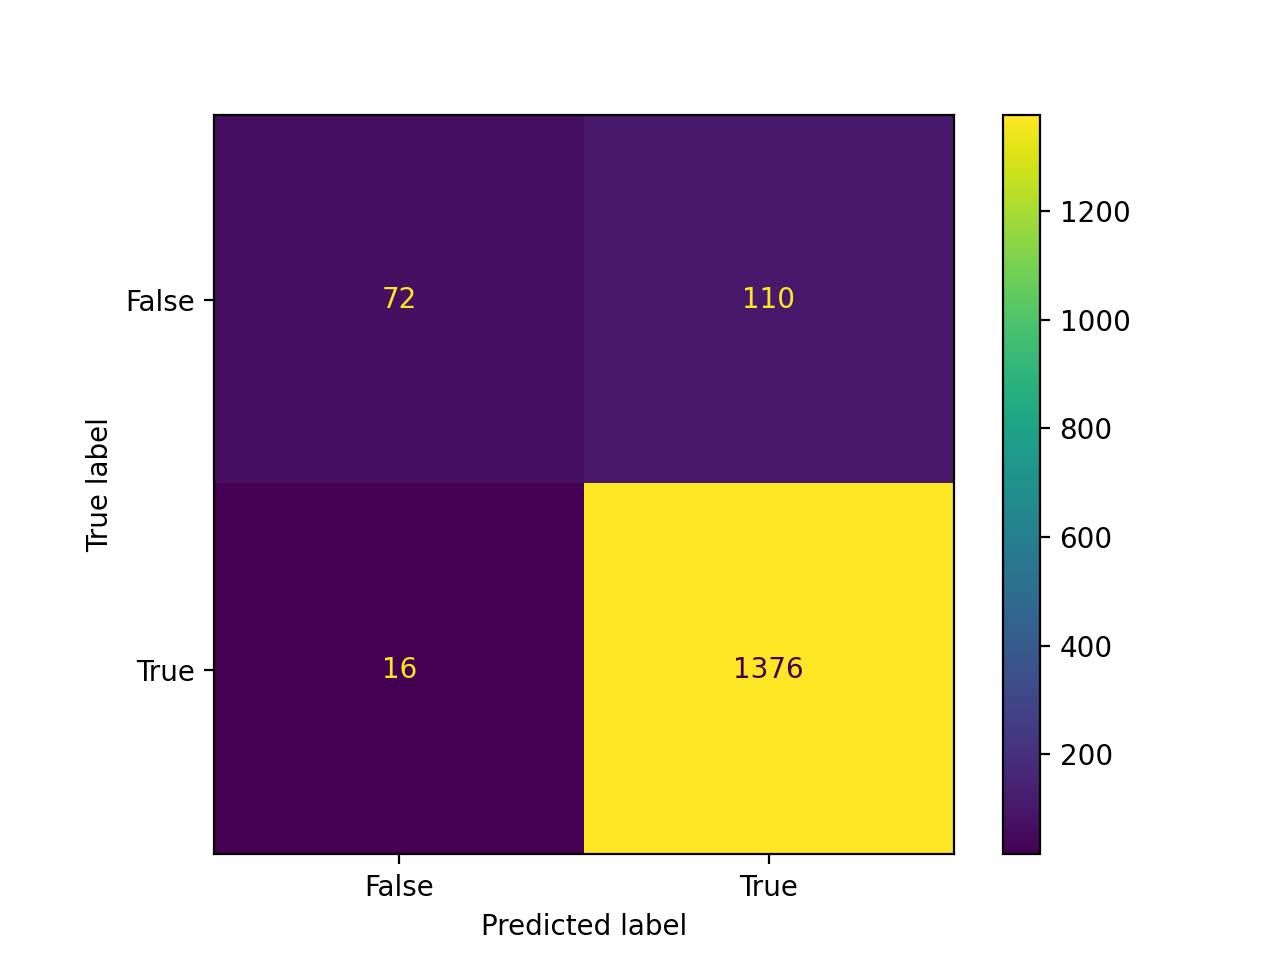

In [ ]:
# Create a confusion matrix

cm = confusion_matrix(y_test1,y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

*** Random Forests Classifier Model

In [ ]:
#######################################
### Random Forests Classifier Model ###
#######################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
ratio = data2['label'].value_counts()[1]/data2['label'].value_counts()[0]
# Class_weight (new code)
cl_weight = {0: 1, 1: ratio}

# Fit with random forest classifier
rf_model = RandomForestClassifier(class_weight=cl_weight, random_state=0)
rf_model.fit(X_train1, y_train1)

# Predict the sentiment on the test data
y_pred_rf = rf_model.predict(X_test1)

# Testing the model on the test set
y_prob_rf = rf_model.predict_proba(X_test1)[:, 1]

# Calculate and print the accuracy of the model
rf_accuracy = accuracy_score(y_test1, y_pred_rf)
print(f"Accuracy of the Random Forest model: {rf_accuracy * 100:.2f}%")

# Assuming compute_accuracy_AUC returns a single float (AUC)
model_AUC_rf = compute_accuracy_AUC('Random Forest', y_test1, y_pred_rf, y_prob_rf)


Accuracy of the Random Forest model: 91.55%
Random Forest model has AUC 0.898809523809524


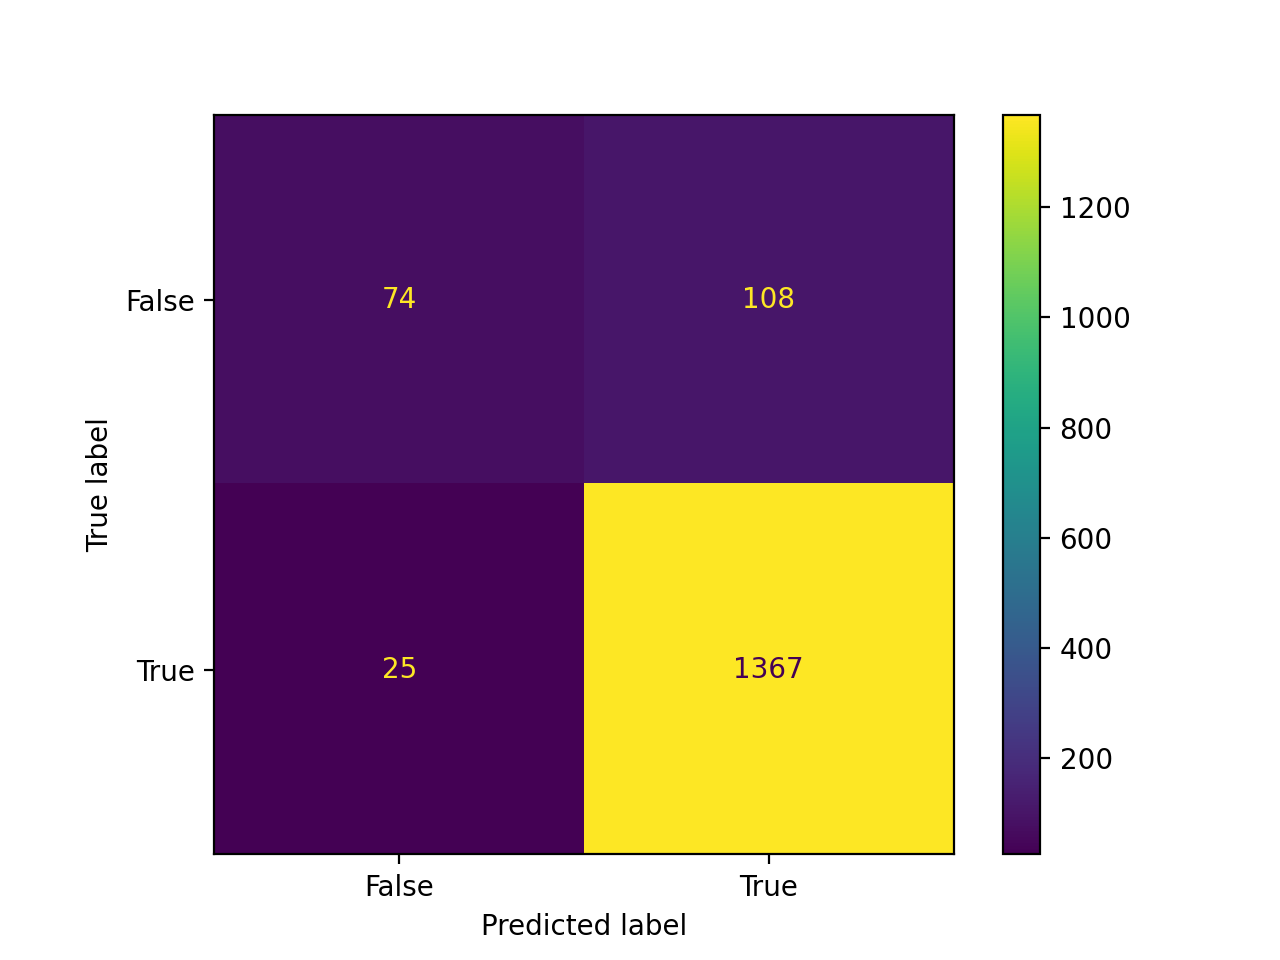

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test1,y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# F1 score is a metric used to evaluate the performace of a classification model
# after it has made predictions. It's not a model itself, but a measure of how
# well a model is performing.

# Calculate F1 score to measure how well the randome forest model performs.

f1_rf = f1_score(y_test1, y_pred_rf)

print(f"F1 Score of the Random Forest Classifier model: {f1_rf:.2f}")

# The F1 score is a measure of a model's performance. It is a weighted average of the precision
# and recall of a model, with results ranging from 0 to 1. A higher F1 score indicates a more accurate model.
# The F1 score is especially useful in situations where the data set is imbalanced, that is, when the number
#of observations in different classes varies greatly.

F1 Score of the Random Forest Classifier model: 0.95


*** XGBoost Model

In [ ]:
###############
### XGBoost ###
###############

# XGBoost has a parameter scale_pos_weight that helps in handling imbalanced datasets.

from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import numpy as np


# Ratio should be the ratio of the number of negative class to the positive class.
# It is calculated below:

y = data2['label']
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

# Instantiate the classifier

xgb = XGBClassifier(scale_pos_weight = ratio)

# Fit the classifier to the training data

xgb.fit(X_train1, y_train1)

# Predict the labels of the test set

y_pred_xgb = xgb.predict(X_test1)

print(y_pred_xgb)

# The output is the array of predicted labels for the test data, as generated by the XGBoost model.
# Each element in this array is a prediction for the corresponding entry in the test data.
# 1 indicates a positive reviews to evaluate the performance and 0 indicates a negative review prediction,
# based on the mapping we defined earlier (1 if rating >=3 else 0).


[1 1 1 ... 0 0 0]


In [ ]:
# AUC Score of XGBoost model

# Predict the probabilities of the test set

y_prob_xgb = xgb.predict_proba(X_test1)[:, 1]

# Compute the AUC scores
auc_xgb = roc_auc_score(y_test1, y_prob_xgb)
print(f"AUC of the XGBoost model: {auc_xgb:.2f}")

AUC of the XGBoost model: 0.92


In [ ]:
# We use the XGBoost prediction above to evaluate the performance of our model by
# comparing them to the actual labels.

# Computing the F1 score

f1_xgb = f1_score(y_test1, y_pred_xgb)

print(f"F1 score of the XGBoost model: {f1_xgb:.2f}")

# An F1 score of 0.91 for both the XGBoost and Random Forest models indicates
# that both models are performing very well on your test data.

F1 score of the XGBoost model: 0.91


*** Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import SVC
# Fit the SVM
svm_model = SVC(class_weight=cl_weight,probability=True)
svm_model.fit(X_train1, y_train1)

# Predict the sentiment on the test data
y_pred_svc = svm_model.predict(X_test1)

# Calculate and print the accuracy of the model
accuracy_svc = accuracy_score(y_test1, y_pred_svc)
print(f"Accuracy of the SVM model: {accuracy_svc * 100:.2f}%")

#testing the model on the test set
y_pred= svm_model.predict(X_test1)
y_prob= svm_model.predict_proba(X_test1)[:, 1]
model_AUC_svm = compute_accuracy_AUC('Support Vector Machines', y_test1, y_pred,  y_prob)

Accuracy of the SVM model: 92.06%
Support Vector Machines model has AUC 0.9252518315018314


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print the F1 score of the model
f1_svc = f1_score(y_test1, y_pred_svc)
print(f"F1 score of the SVM model: {f1_svc:.2f}")

F1 score of the SVM model: 0.96


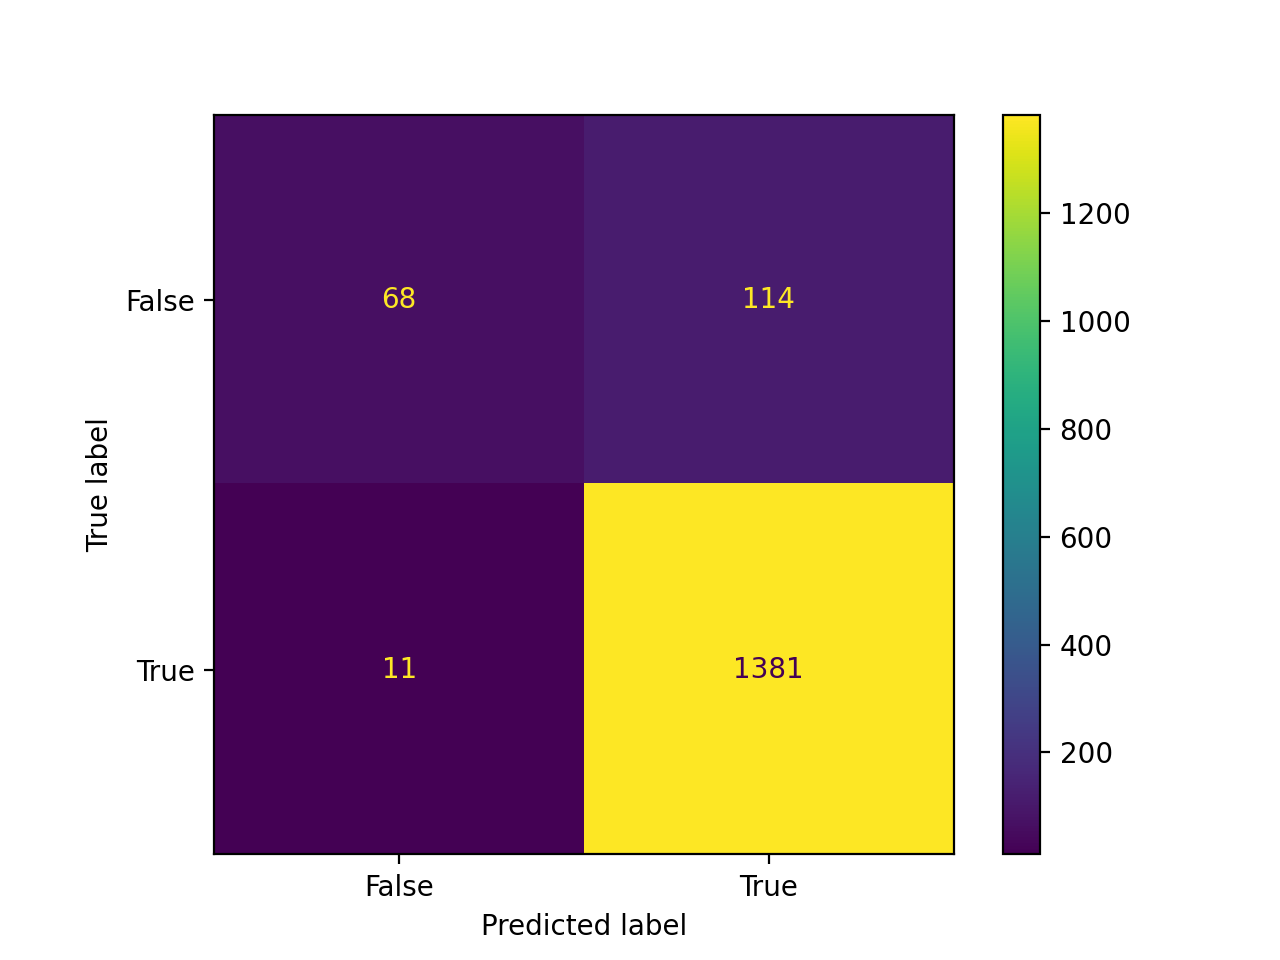

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test1,y_pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

*** Cross Validation Model

In [ ]:
########################################
##.      Hyper parameter tuning.      ##
########################################
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.metrics import make_scorer,classification_report,f1_score, roc_auc_score, precision_score, recall_score

# Define the hyperparameter grid
par_grid = dict(max_depth = randint(low=2, high=6), n_estimators=randint(low=50, high=150), \
    min_samples_split = randint(low=2, high=6), max_samples=[0.3, 0.5, 0.7, 0.9] )



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
rf = RandomForestClassifier()

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, par_grid, cv=5, scoring='roc_auc', n_jobs=-1,random_state=42)

# Fit to the data
cv_model = random_search.fit(X_train1, y_train1)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
auc_rcv=random_search.best_score_
print(f"AUC score: {random_search.best_score_:.2f}")

Best parameters: {'max_depth': 4, 'max_samples': 0.9, 'min_samples_split': 5, 'n_estimators': 132}
AUC score: 0.89


In [ ]:
# Instantiate the RandomizedSearchCV object with 'f1' scoring

random_search = RandomizedSearchCV(rf, par_grid, cv = 5, scoring = 'f1', n_jobs = -1,random_state=42)

# Fit to the data

random_search.fit(X_train1, y_train1)

# Print the best parameters and the best F1 score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.2f}")

Best parameters: {'max_depth': 5, 'max_samples': 0.7, 'min_samples_split': 5, 'n_estimators': 128}
Best F1 score: 0.94


## Comparision of F1 scores

In [ ]:
print(f"F1 score of the Support Vector Machine model: {f1_svc:.2f}")
print(f"F1 Score of the Logistic Regression model: {f1_lr:.2f}")
print(f"F1 Score of the Random Forest Classifier model: {f1_rf:.2f}")
print(f"F1 score of the XGBoost model: {f1_xgb:.2f}")
print(f"F1 Score of the Cross Validation model: {random_search.best_score_:.2f}")

F1 score of the Support Vector Machine model: 0.96
F1 Score of the Logistic Regression model: 0.96
F1 Score of the Random Forest Classifier model: 0.95
F1 score of the XGBoost model: 0.91
F1 Score of the Cross Validation model: 0.94


## Comparison of AUC Scores

In [ ]:
print(f"AUC score of the Support Vector Machine model: {model_AUC_svm:.2f}")
print(f"AUC score of the Logistic Regression model: {model_AUC_lg:.2f}")
print(f"AUC score of the Random Forest model: {model_AUC_rf:.2f}")
print(f"AUC score of the XGBoost model: {auc_xgb:.2f}")
print(f"AUC score of the Cross Validation model: {auc_rcv:.2f}")

AUC score of the Support Vector Machine model: 0.93
AUC score of the Logistic Regression model: 0.94
AUC score of the Random Forest model: 0.90
AUC score of the XGBoost model: 0.92
AUC score of the Cross Validation model: 0.94


In [ ]:
# Visual the score
import matplotlib.pyplot as plt

# Data
model = ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost', 'Cross Vadiation-RF']
f1 = [2, 4, 3, 1]
auc = [model_AUC_rf, model_AUC_lg, model_AUC_svm, auc_xgb,]

# Plotting AUC scores
plt.plot(model, auc, marker='o', label='AUC')

# Plotting F1 scores
plt.plot(model, f1, marker='o', label='F1')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('AUC and F1 Scores by Model')
plt.legend()  # Show legend for clarity

# Display the plot
plt.show()


## Summary

In [ ]:
#########################
##.      SUMMARY       ##
#########################
# Data
model = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'RandomizedCV']
auc = [0.9, 0.94, 0.93, 0.92, 0.89]
f1 = [0.95, 0.96, 0.96, 0.91, 0.94]

# Creating a PrettyTable
table = PrettyTable()
table.field_names = ["Model", "AUC", "F1"]

# Adding data to the table
for m, a, f in zip(model, auc, f1):
    table.add_row([m, a, f])

# Printing the table
print(table)


In [ ]:
####################################
##.      VISUAL METRIC SCORE      ##
####################################

# Plotting AUC scores
plt.plot(model, auc, marker='o', label='AUC')

# Plotting F1 scores
plt.plot(model, f1, marker='o', label='F1')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('AUC and F1 Scores by Model')
plt.legend()  # Show legend for clarity

# Display the plot
plt.show()